In [142]:
import pandas as pd

DATA_PATH = r'../data/credit.csv'
df = pd.read_csv(DATA_PATH)

# processing
# Remove where rows are almost entirely empty
df = df[df['location'] != '?'] # removes 2 rows
df = df[df['checking_amt'] != '?'] # removes 1 row
df['state'] = df['state'].replace('Rhodes Island', 'Rhode Island')
# Have verified that state in 'location' matches 'state', so this is not needed.
# df['abbrv'] = pd.Series(dtype='string')



# location      # verified
# state         # verified
# checking_amt
# duration
# credit_history
# purpose
# credit_amount
# savings
# employment
# installment_commitment
# personal_status
# other_parties
# residence_since
# property_magnitude
# age
# other_payment_plans
# housing
# existing_credits
# job
# num_dependents
# own_telephone
# foreign_worker
# class
# verified
# application_date
# works_outside_US



In [143]:
for _ in df.columns:
    print(_)

location
state
checking_amt
duration
credit_history
purpose
credit_amount
savings
employment
installment_commitment
personal_status
other_parties
residence_since
property_magnitude
age
other_payment_plans
housing
existing_credits
job
num_dependents
own_telephone
foreign_worker
class
verified
application_date
works_outside_US


In [144]:
abbrv_map = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

def seperate_locs(row):
    try:
        loc, state_abbrv = row['location'].split(', ')
    except Exception as e:
        print(row['location'])
        raise e
    row['abbrv'] = abbrv_map[state_abbrv]
    row['location'] = loc
    return row['location']

df['location'] = df['location'].str.replace('District of Columbia', 'District of Columbia, DC')
# df['abbrv'] = df.apply(seperate_locs, axis=1)
df['location'] = df['location'].str.split(', ').apply(lambda x: x[0])

In [147]:
for _ in df['checking_amt'].value_counts().items():
    print(_)

(0.0, 446)
(124.56, 2)
(-7638.04, 1)
(-9454.08, 1)
(41.55, 1)
(-5723.26, 1)
(115.65, 1)
(161.2, 1)
(-2118.37, 1)
(-7930.96, 1)
(-4887.82, 1)
(101.81, 1)
(165.23, 1)
(28.13, 1)
(71.62, 1)
(-2589.19, 1)
(94.62, 1)
(97.6, 1)
(-9858.79, 1)
(177.2, 1)
(-7808.18, 1)
(-2884.07, 1)
(-4083.0, 1)
(-8135.03, 1)
(-6338.95, 1)
(104.1, 1)
(-4718.69, 1)
(184.53, 1)
(2165.21, 1)
(169.84, 1)
(169.67, 1)
(5588.7, 1)
(-6090.13, 1)
(105.1, 1)
(75.44, 1)
(-255.77, 1)
(-1502.18, 1)
(-9599.81, 1)
(4.36, 1)
(8529.36, 1)
(7338.22, 1)
(-517.47, 1)
(3235.45, 1)
(195.71, 1)
(1789.83, 1)
(-5039.28, 1)
(94.26, 1)
(198.94, 1)
(180.59, 1)
(45.54, 1)
(-139.76, 1)
(99.84, 1)
(38.12, 1)
(47.73, 1)
(-1681.76, 1)
(-5400.65, 1)
(-565.62, 1)
(45.62, 1)
(-4772.2, 1)
(-3145.9, 1)
(1525.11, 1)
(-8206.97, 1)
(22.41, 1)
(-2075.66, 1)
(98.29, 1)
(-860.04, 1)
(-9112.68, 1)
(79.58, 1)
(-5730.5, 1)
(-6131.59, 1)
(-34.79, 1)
(2609.44, 1)
(17.19, 1)
(3311.7, 1)
(150.56, 1)
(10.4, 1)
(85.74, 1)
(50.65, 1)
(6044.46, 1)
(-350.28, 1)
(141

ValueError: Some of the variables to trasnform contain missing values. Check and remove those before using this transformer.

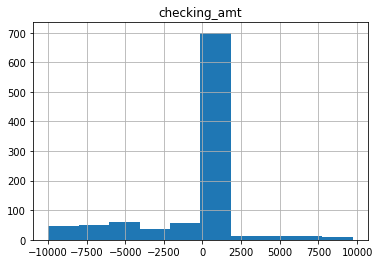

In [146]:
# from feature_engine.discretisers import EqualWidthDiscretiser, EqualFrequencyDiscretiser
# import matplotlib.pyplot as plt
# df['checking_amt'] = df['checking_amt'].apply(float)
# df.hist(column='checking_amt')


# eqdist_discretiser = EqualWidthDiscretiser(bins=10, variables=['checking_amt'])
# df = eqdist_discretiser.fit_transform(df)

# df.hist(column='checking_amt')

# Binning is the way to go?

In [150]:
df[df['checking_amt'].isna()]

SyntaxError: invalid syntax (<ipython-input-150-2220b6bbae70>, line 1)